%%html
<h1>Dam tot dam loop analysis file</h1>
<p>This notebook will generate some insights on the Dam tot Dam loops that took place between 2016 and 2020. 
   The analysis considers the times set by all participants that ran in the recreationists (in Dutch recreanten) category 
        <p/>
        
<p> This notebook will utilize the data from the ReadmeFile where all data is collected<p/>  

In [12]:
#import the necessary libraries 
import pandas as pd
from datetime import timedelta
import seaborn as sns
import requests
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
%matplotlib inline

In [2]:
###load the data 
df = pd.read_csv('data/damtotdamloopdata.csv')
df['distance'] = df['distance'] / 1000

In [3]:
%%html
<h1>Runners by year 2016 - 2020<h1/>

In [25]:
df.groupby(['year','sex'])['BIB'].count().reset_index().sort_values('sex',ascending=False)

,year,sex,BIB
1,2016,Male,5693
3,2017,Male,6742
5,2018,Male,6599
7,2019,Male,6737
9,2020,Male,1391
0,2016,Female,4309
2,2017,Female,4998
4,2018,Female,4593
6,2019,Female,4041
8,2020,Female,748


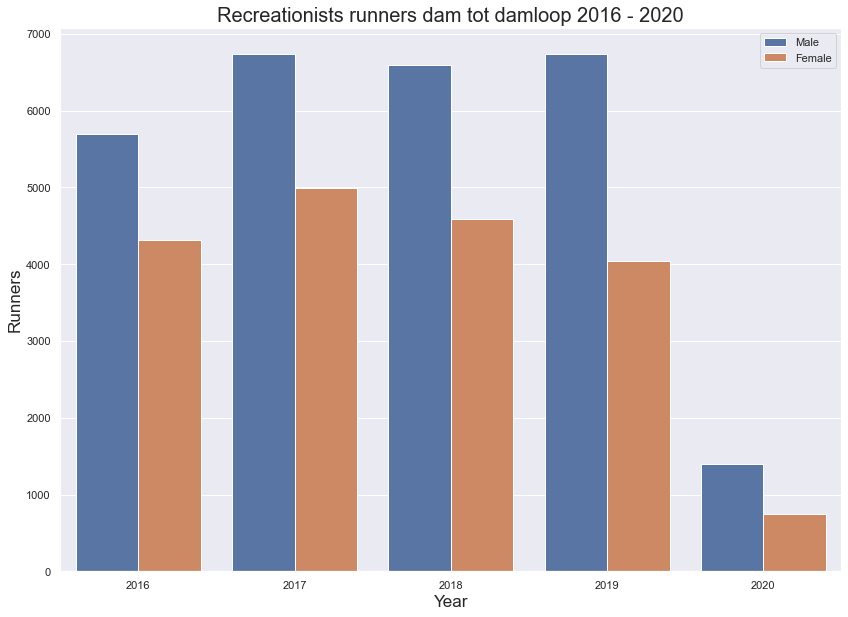

In [26]:
sns.set(rc={'figure.figsize':(14,10)})
sns.color_palette("Paired")



sns.barplot(data=df.groupby(['year','sex'])['BIB'].count().reset_index().sort_values('sex',ascending=False),
            x='year',y='BIB',hue='sex',order=list(np.sort(df['year'].astype(int).unique())))

# for index, row in df.groupby(['year','sex'])['BIB'].count().reset_index().iterrows():
#     text(row.name,row.BIB, round(row.BIB,2))

plt.title('Recreationists runners dam tot damloop 2016 - 2020',fontsize=20)
plt.xlabel('Year',fontsize=17)

plt.legend()
plt.ylabel('Runners',fontsize=17)
plt.show()

# ;

In [5]:
%%html
<h1>Average speed of Females and Males<h1/>

In [6]:
%%html
<h1>Average speed of Females and Males distribution<h1/>

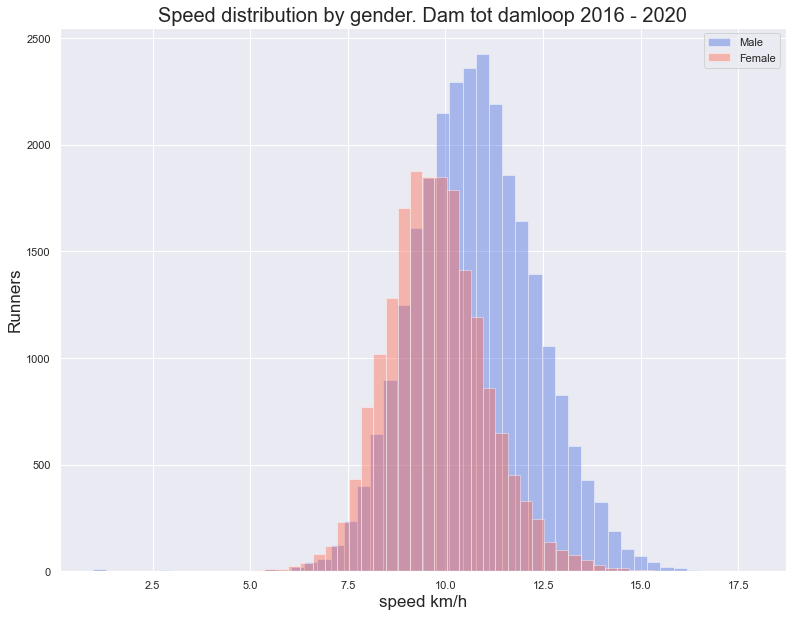

''

In [30]:
sns.set(rc={'figure.figsize':(13,10)})
sns.color_palette("Paired")
sns.distplot(df.loc[df['sex']=='Male']['speed'],label='Male',kde=False,color="royalblue")
sns.distplot(df.loc[df['sex']=='Female']['speed'],label='Female',kde=False,color="tomato")
plt.title('Speed distribution by gender. Dam tot damloop 2016 - 2020',fontsize=20)
plt.xlabel('speed km/h',fontsize=17)
plt.legend()
plt.ylabel('Runners',fontsize=17)
plt.show()
;

In [8]:
%%html
<h1> Busting some myths<h1/>

In [9]:
%%html
<h2>1. The further you live from Amsterdam the faster you run.<h2/>

In [32]:
data1 = df[(~df['city'].isin(['Amsterdam','unknown'])) & (df['distance'] <20000)& (df['distance'] >-1) 
          & (df['speed'] >5)
          & (df['sex'] == 'Female')]


data2 = df[(~df['city'].isin(['Amsterdam','unknown'])) & (df['distance'] <20000)& (df['distance'] >-1) 
          & (df['speed'] >5)
          & (df['sex'] == 'Male')]

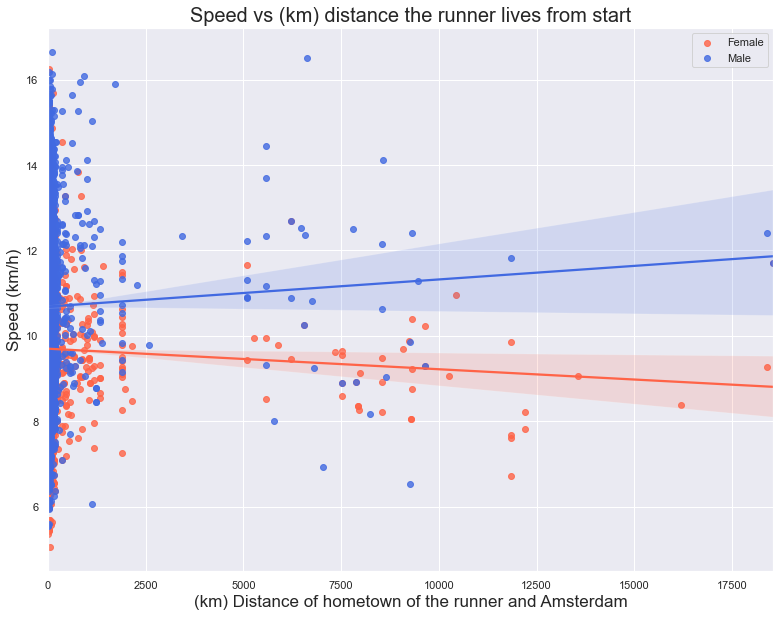

''

In [35]:
sns.set(rc={'figure.figsize':(13,10)})
# sns.regplot(x="distance", y="speed",label='Female',data=data1.sample(1000))
sns.regplot(x="distance", y="speed",label='Female',data=data1.sample(10000),color='tomato')
sns.regplot(x="distance", y="speed",label='Male',data=data2.sample(10000),color='royalblue')
plt.title('Speed vs (km) distance the runner lives from start',fontsize=20)
plt.xlabel('(km) Distance of hometown of the runner and Amsterdam',fontsize=17)
plt.legend()
plt.ylabel('Speed (km/h)',fontsize=17)
plt.show()
;

In [12]:
print('Correlation is : ',data2.corr()['distance'][4])

Correlation is :  0.031078021516224713


In [13]:
%%html
<h2>The longer it takes to cross the start line after the start signal the slower your time will be<h2/>

In [53]:
df['sex'].sort_values(ascending=False).unique()

array(['Male', 'Female'], dtype=object)

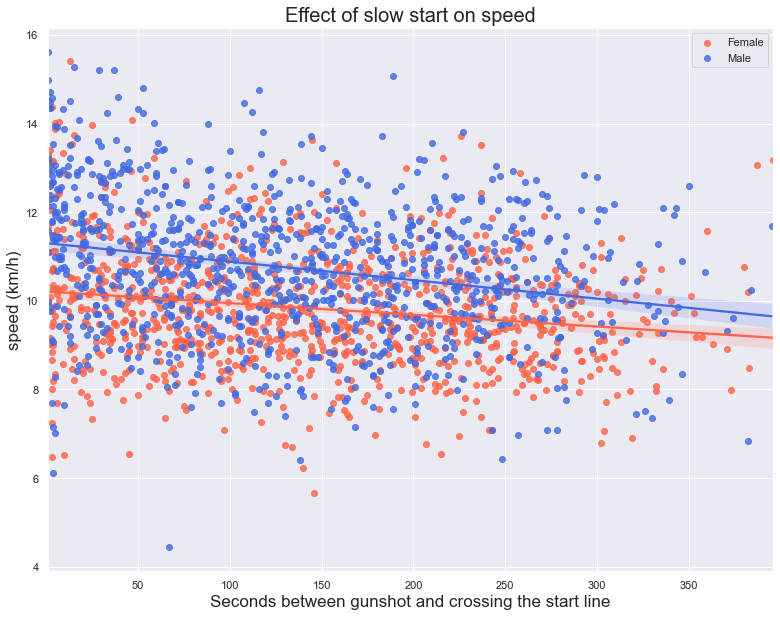

In [45]:
sns.set(rc={'figure.figsize':(13,10)})
sns.regplot(x="diff_gun_realtime", y="speed",label='Female',color="tomato",
            data=df[(df['diff_gun_realtime']<500) & (df['diff_gun_realtime']>0) & (df['sex'] =='Female')].sample(1000))

sns.regplot(x="diff_gun_realtime", y="speed",label='Male',color="royalblue",
            data=df[(df['diff_gun_realtime']<500) & (df['diff_gun_realtime']>0) & (df['sex'] =='Male')].sample(1000))
plt.title('Effect of slow start on speed',fontsize=20)
plt.ylabel('speed (km/h)',fontsize=17)
plt.legend()
plt.xlabel('Seconds between gunshot and crossing the start line',fontsize=17)
plt.show()

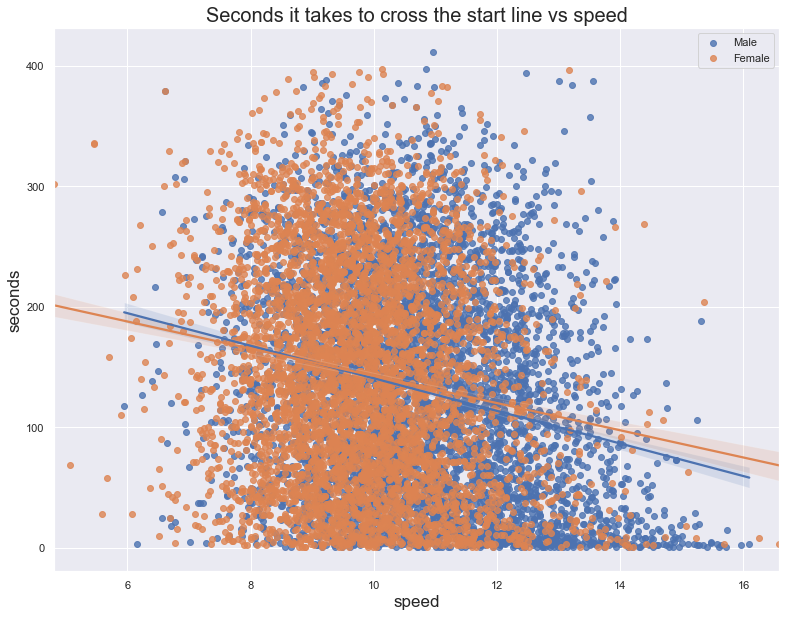

In [55]:
sns.set(rc={'figure.figsize':(13,10)})


sns.regplot(x="speed", y="diff_gun_realtime",label='Male',
            data=df[(df['diff_gun_realtime']<500) & (df['diff_gun_realtime']>0) & (df['sex'] =='Male')].sample(5000))
sns.regplot(x="speed", y="diff_gun_realtime",label='Female',
            data=df[(df['diff_gun_realtime']<500) & (df['diff_gun_realtime']>0) & (df['sex'] =='Female')].sample(5000)
           )
plt.title('Seconds it takes to cross the start line vs speed',fontsize=20)
plt.ylabel('seconds',fontsize=17)
plt.legend()
plt.xlabel('speed',fontsize=17)
plt.show()

In [57]:
%%html
<h2>Male participants cross the start line faster than female runners?<h2/>

No handles with labels found to put in legend.


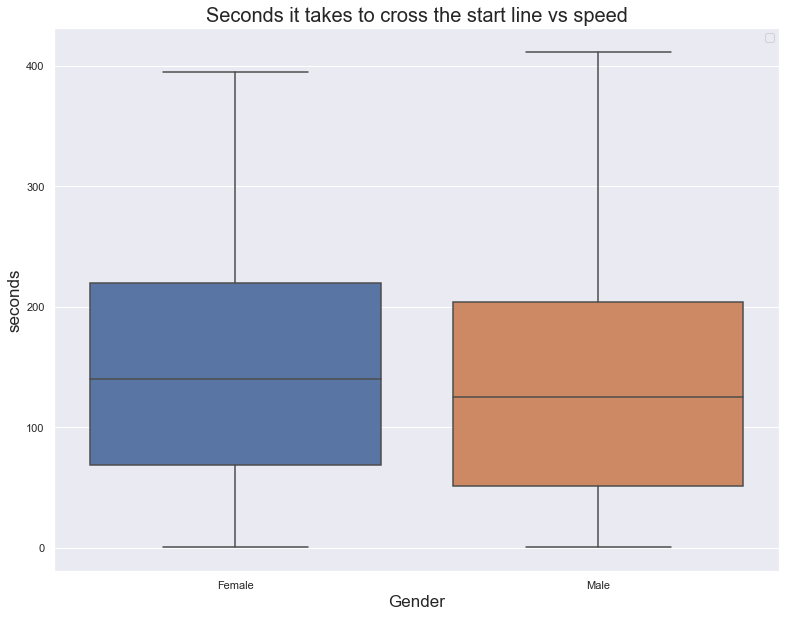

In [63]:
sns.set(rc={'figure.figsize':(13,10)})


sns.boxplot(x="sex", y="diff_gun_realtime",
            data=df[(df['diff_gun_realtime']<500) & (df['diff_gun_realtime']>0)].sample(5000))
# sns.regplot(x="speed", y="diff_gun_realtime",label='Female',
#             data=df[(df['diff_gun_realtime']<500) & (df['diff_gun_realtime']>0) & (df['sex'] =='Female')].sample(5000)
           
plt.title('Seconds it takes to cross the start line vs speed',fontsize=20)
plt.ylabel('seconds',fontsize=17)
plt.legend()
plt.xlabel('Gender',fontsize=17)
plt.show()

In [16]:
%%html
<h2>Was there a difference in time in 2019 vs other years<h2/>

No handles with labels found to put in legend.


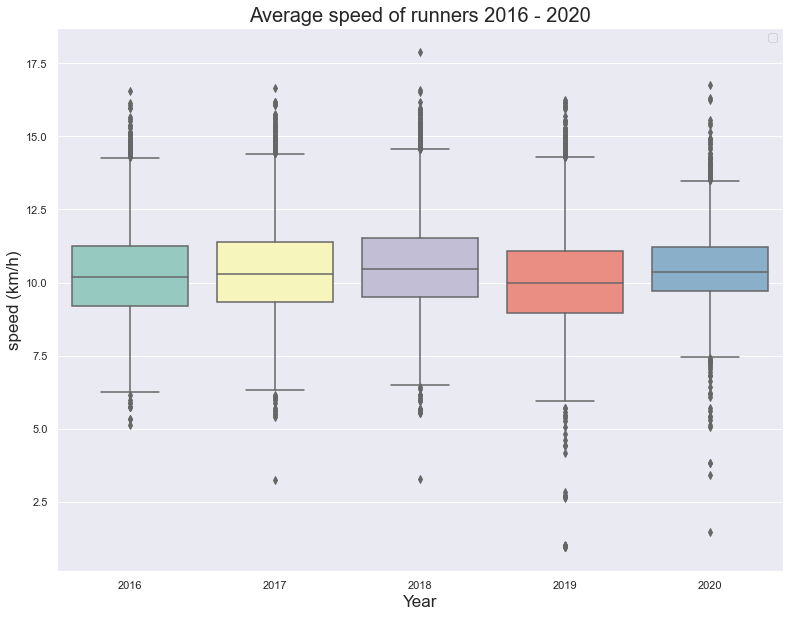

In [64]:
sns.set(rc={'figure.figsize':(13,10)})
sns.color_palette("Paired")
ax = sns.boxplot(x="year", y="speed",palette="Set3",
                 data=df)
plt.title('Average speed of runners 2016 - 2020',fontsize=20)
plt.ylabel('speed (km/h)',fontsize=17)
plt.legend()
plt.xlabel('Year',fontsize=17)
plt.show()

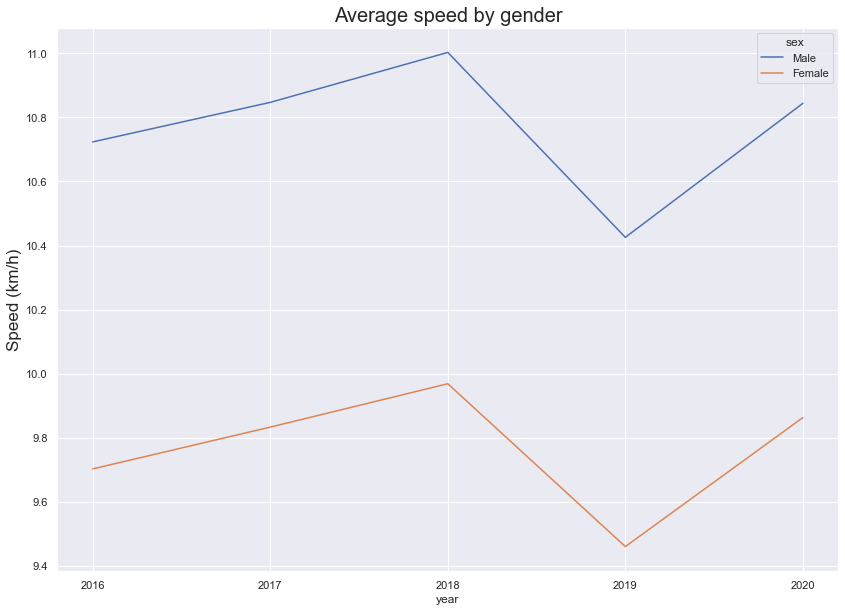

In [42]:
sns.set(rc={'figure.figsize':(14,10)})
sns.color_palette("Paired")

sns.lineplot(data=df.groupby(['year','sex'])['speed'].mean().reset_index().sort_values('sex',ascending=False),
            x='year',y='speed',hue='sex')
plt.xticks(np.arange(2016,2021))
plt.title('Average speed by gender',fontsize=20)
plt.ylabel('Average speed',fontsize=17)
plt.ylabel('Speed (km/h)',fontsize=17)
plt.show()